In [33]:
from os import listdir
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression





In [34]:
for items in listdir(path='.'):
    print(items)

.ipynb_checkpoints
Birthweight_feature2_for_Assignment.xlsx
Birthweight_feature3_for_Assignment.xlsx
Birthweight_feature_for_Assignment.xlsx
birthweight_low.xlsx
Birth_weight.ipynb
Correlation between birthweight and father's education.png
Sessions 1-4 (Regression Modeling)
Sessions 1-4 (Regression Modeling).ipynb
Untitled.ipynb
Untitled1.ipynb
Uzodinma_Olisadubem_A1_Regression_Analysis.ipynb
__MACOSX
~$Birthweight_feature2_for_Assignment.xlsx


In [35]:
file = './birthweight_low.xlsx'

birthweight = pd.read_excel(io        = file,
                    sheet_name = 0,
                    header     = 0)

birthweight.head(n=15)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [36]:
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [37]:
# Checking for missing values

birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [38]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_npvis', 'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

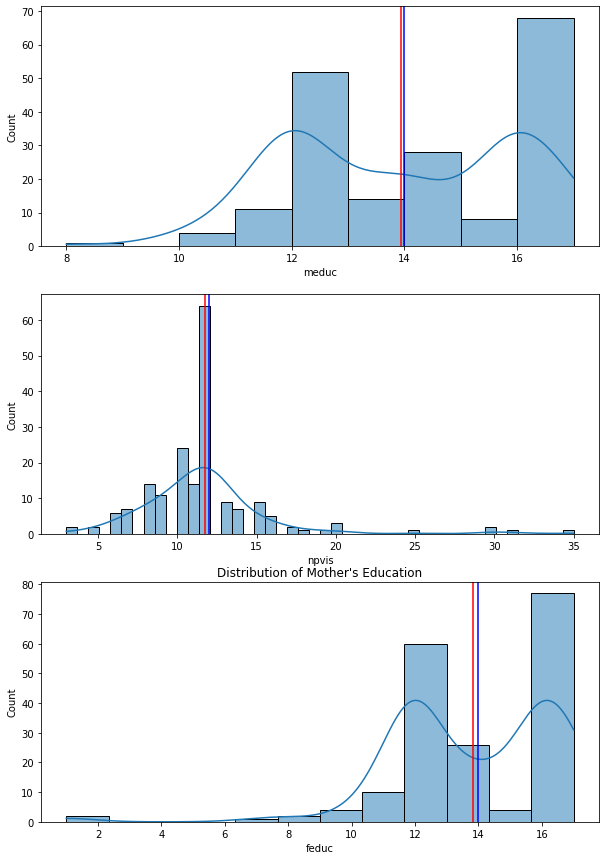

In [39]:
# creating a dropped dataset to visualize 'meduc', 'npvis', and 'feduc'

df_dropped = birthweight.dropna()

fig, ax = plt.subplots(figsize = [10,15])


# displaying the plot for 'meduc'
plt.subplot(3,1,1)
sns.histplot(x = 'meduc',
            data = df_dropped,
            kde = True)

plt.axvline(x = df_dropped['meduc'].mean(), color = 'red')
plt.axvline(x = df_dropped['meduc'].median(), color = 'blue')

# displaying the plot for 'npvis'
plt.subplot(3,1,2)
sns.histplot(x = 'npvis',
            data = df_dropped,
            kde = True)

plt.axvline(x = df_dropped['npvis'].mean(), color = 'red')
plt.axvline(x = df_dropped['npvis'].median(), color = 'blue')

# displaying the plot for 'feduc'
plt.subplot(3,1,3)
sns.histplot(x = 'feduc',
            data = df_dropped,
            kde = True)

plt.axvline(x = df_dropped['feduc'].mean(), color = 'red')
plt.axvline(x = df_dropped['feduc'].median(), color = 'blue')


# title and labels
plt.title("Distribution of Mother's Education")


# displaying the plot
plt.show()

In [40]:
# soft coding MEDIAN for meduc, npvis and feduc
meduc_mean = birthweight['meduc'].mean()

birthweight['meduc'].fillna(value = meduc_mean,
                         inplace = True)

npvis_mean = birthweight['npvis'].mean()

birthweight['npvis'].fillna(value = npvis_mean,
                         inplace = True)

feduc_mean = birthweight['feduc'].mean()

birthweight['feduc'].fillna(value = feduc_mean,
                         inplace = True)


print(birthweight["meduc"].isnull().any(),
      birthweight["npvis"].isnull().any(),
      birthweight["feduc"].isnull().any())

False False False


In [41]:
birthweight.head(n =10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,13.911917,5,2.0,62,13.846561,4,7,23,9,...,0,1,0,0,1,0,697,1,0,1
1,68,12.000000,3,10.0,61,11.000000,4,6,25,11,...,1,0,0,1,0,0,1290,0,0,0
2,71,12.000000,3,6.0,46,12.000000,2,7,21,12,...,0,1,0,0,1,0,1490,0,0,0
3,59,16.000000,1,8.0,48,16.000000,7,8,21,10,...,0,0,1,0,0,1,1720,0,0,0
4,48,12.000000,4,6.0,39,12.000000,2,9,17,13,...,1,0,0,1,0,0,1956,0,0,0
5,67,11.000000,4,8.0,40,8.000000,4,9,16,14,...,1,0,0,1,0,0,1984,0,0,0
6,54,12.000000,2,12.0,46,12.000000,9,9,17,12,...,0,1,0,0,1,0,2050,0,0,0
7,71,14.000000,4,7.0,51,11.000000,9,8,15,13,...,1,0,0,1,0,0,2068,0,0,0
8,56,12.000000,1,9.0,53,14.000000,8,9,14,9,...,1,0,0,1,0,0,2148,0,0,0
9,58,12.000000,2,12.0,61,16.000000,9,9,13,6,...,0,1,0,0,1,0,2180,0,0,0


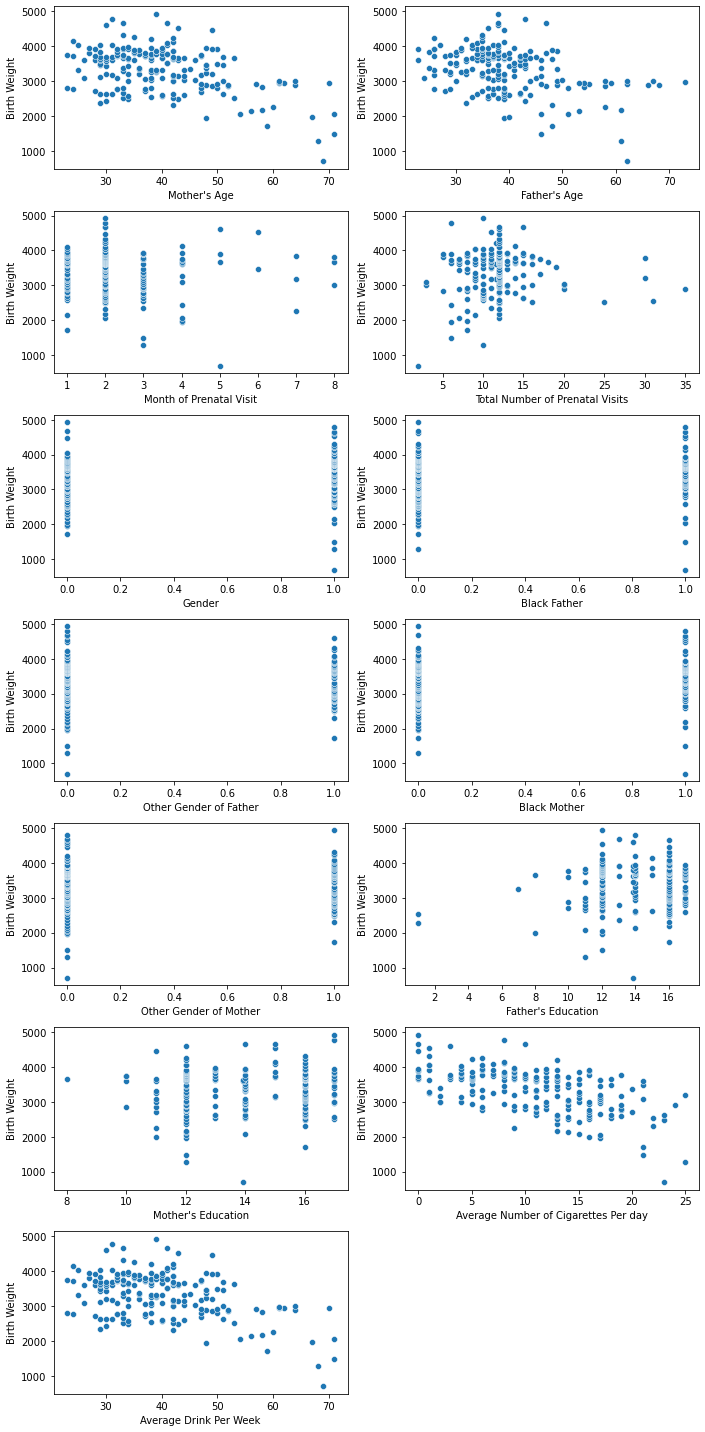

In [42]:
# creating scatterplots to better understand the relationship between the explanatory variables and the target variables

fig, ax = plt.subplots(figsize = [10,20])

plt.subplot(7,2,1)
sns.scatterplot(x = bw_dropped['mage'],
                y = bw_dropped['bwght'])

plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,2)
sns.scatterplot(x =  bw_dropped['fage'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,3)
sns.scatterplot(x =  bw_dropped['monpre'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Month of Prenatal Visit")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,4)
sns.scatterplot(x =  bw_dropped['npvis'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Total Number of Prenatal Visits")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,5)
sns.scatterplot(x =  bw_dropped['male'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Gender")
plt.ylabel(ylabel = "Birth Weight")


plt.subplot(7,2,6)
sns.scatterplot(x =  bw_dropped['fblck'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Black Father")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,7)
sns.scatterplot(x =  bw_dropped['foth'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Other Gender of Father")
plt.ylabel(ylabel = "Birth Weight")


plt.subplot(7,2,8)
sns.scatterplot(x =  bw_dropped['mblck'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Black Mother")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,9)
sns.scatterplot(x =  bw_dropped['moth'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Other Gender of Mother")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,10)
sns.scatterplot(x =  bw_dropped['feduc'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,11)
sns.scatterplot(x =  bw_dropped['meduc'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,12)
sns.scatterplot(x =  bw_dropped['cigs'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Average Number of Cigarettes Per day")
plt.ylabel(ylabel = "Birth Weight")

plt.subplot(7,2,13)
sns.scatterplot(x =  bw_dropped['mage'],
                y =  bw_dropped['bwght'])

plt.xlabel(xlabel = "Average Drink Per Week")
plt.ylabel(ylabel = "Birth Weight")

plt.tight_layout()

plt.show()

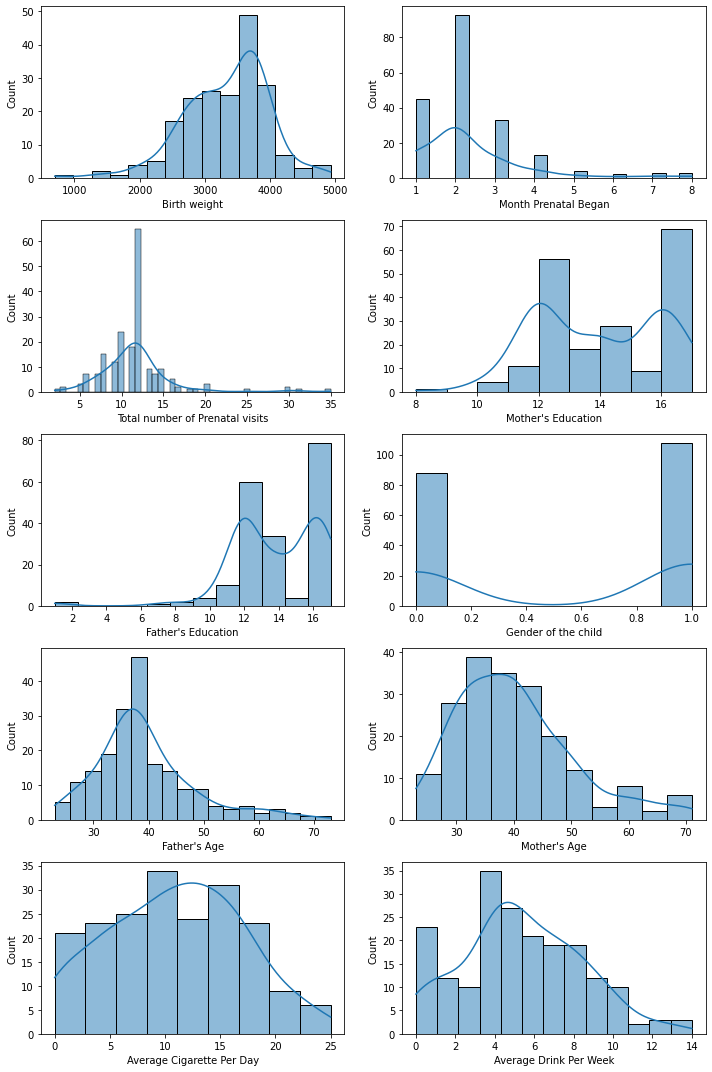

In [43]:
# checking for skewness in the variables with histoplots

#Initiating multiple histoplots
fig, ax = plt.subplots(figsize = [10,15])

# First Histoplot
plt.subplot(5,2,1)

sns.histplot(data =  bw_dropped,
             x    = 'bwght',
             kde  = True)

plt.xlabel(xlabel = 'Birth weight')
plt.ylabel(ylabel = 'Count')

# second Histoplot
plt.subplot(5,2,2)

sns.histplot(data =  bw_dropped,
             x    = 'monpre',
             kde  = True)

plt.xlabel(xlabel = 'Month Prenatal Began')
plt.ylabel(ylabel = 'Count')

# Third Histoplot
plt.subplot(5,2,3)

sns.histplot(data =  bw_dropped,
             x    = 'npvis',
             kde  = True)

plt.xlabel(xlabel = 'Total number of Prenatal visits')
plt.ylabel(ylabel = 'Count')

# Fourth Histoplot
plt.subplot(5,2,4)

sns.histplot(data =  bw_dropped,
             x    = 'meduc',
             kde  = True)

plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Count')

# Fifth Histoplot
plt.subplot(5,2,5)

sns.histplot(data =  bw_dropped,
             x    = 'feduc',
             kde  = True)

plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Count')

# Six Histoplot
plt.subplot(5,2,6)

sns.histplot(data =  bw_dropped,
             x    = 'male',
             kde  = True)

plt.xlabel(xlabel = 'Gender of the child')
plt.ylabel(ylabel = 'Count')

# Seventh Histoplot
plt.subplot(5,2,7)

sns.histplot(data =  bw_dropped,
             x    = 'fage',
             kde  = True)

plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = 'Count')

# Eight Histoplot
plt.subplot(5,2,8)

sns.histplot(data =  bw_dropped,
             x    = 'mage',
             kde  = True)

plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = 'Count')

plt.subplot(5,2,9)

sns.histplot(data =  bw_dropped,
             x    = 'cigs',
             kde  = True)

plt.xlabel(xlabel = 'Average Cigarette Per Day')
plt.ylabel(ylabel = 'Count')

plt.subplot(5,2,10)

sns.histplot(data =  bw_dropped,
             x    = 'drink',
             kde  = True)

plt.xlabel(xlabel = 'Average Drink Per Week')
plt.ylabel(ylabel = 'Count')


plt.tight_layout()

plt.show()

In [44]:
birthweight.columns


Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc'],
      dtype='object')

In [47]:
# preparing explanatory variable data
bw_data   = birthweight.drop(["bwght"],
                               #"monpre",
                               #"meduc",
                               #"npvis",
                               #"feduc"],
                               axis = 1)


# preparing response variables
bw_target = birthweight.loc[ : , "bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            bw_data,
            bw_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



In [48]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc'],
      dtype='object')

In [59]:
# declaring set of x-variables
x_variables = ['mage', 'meduc', 'npvis', 'feduc', 'fage', 'cigs', 'drink', 'male', 
            'moth', 'foth', 'm_meduc', 'm_npvis']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
meduc +
npvis +
feduc +
fage +
cigs +
drink +
male +
moth +
foth +
m_meduc +
m_npvis +


In [60]:
# merging X_train and y_train so that they can be used in statsmodels
bw_train = pd.concat([x_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                meduc +
                                npvis +
                                feduc +
                                fage +
                                cigs +
                                drink +
                                male +
                                moth +
                                foth +
                                m_meduc +
                                m_npvis""",
                                data = bw_train)

# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     31.87
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.77e-33
Time:                        21:31:02   Log-Likelihood:                -1065.5
No. Observations:                 147   AIC:                             2157.
Df Residuals:                     134   BIC:                             2196.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4384.2122    295.278     14.848      0.0

In [68]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ :, x_variables]


# preparing response variable
bw_target = birthweight.loc[ :, 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bw_data,     # x-variables
            bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [70]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7405
OLS Testing Score  : 0.5827
OLS Train-Test Gap : 0.1578


In [71]:
# zipping each feature name to its coefficient
lr_model_values = zip(bw_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4384.21)
('mage', -14.87)
('meduc', 26.44)
('npvis', 2.66)
('feduc', 20.64)
('fage', -3.54)
('cigs', -39.22)
('drink', -99.38)
('male', 64.6)
('moth', -140.23)
('foth', 26.15)
('m_meduc', -396.05)
('m_npvis', 523.25)


In [63]:
import sklearn.linear_model 

In [72]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.7436
Lasso Testing Score  : 0.6181
Lasso Train-Test Gap : 0.1578


C:\Users\chose\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [64]:
# zipping each feature name to its coefficient
lasso_model_values = zip(bw_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3808.03)
('mage', -13.71)
('meduc', 17.9)
('monpre', 0.0)
('npvis', 0.63)
('fage', -2.7)
('feduc', 14.95)
('omaps', 0.0)
('fmaps', 76.71)
('cigs', -37.63)
('drink', -98.47)
('male', 46.42)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -74.02)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('m_meduc', -229.69)
('m_npvis', 349.04)
('m_feduc', 0.0)


In [66]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3808.03)
('mage', -13.71)
('meduc', 17.9)
('npvis', 0.63)
('fage', -2.7)
('feduc', 14.95)
('fmaps', 76.71)
('cigs', -37.63)
('drink', -98.47)
('male', 46.42)
('moth', -74.02)
('m_meduc', -229.69)
('m_npvis', 349.04)


In [74]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso'],
           
    'Training' : [lr_train_score, lasso_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7405           0.5827
Lasso      0.7436           0.6181


